In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Find the most recent date in the data set.
date_max = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_max


('2017-08-23')

In [25]:
year_data.all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

<AxesSubplot:xlabel='Date'>

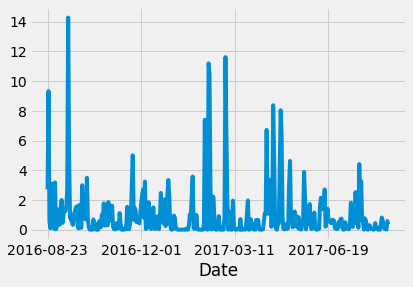

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
query_date
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
      Measurement.prcp]
year_data = session.query(*sel).filter(Measurement.date >= query_date)
year_data
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(year_data, columns=['Date','Precipitation'])
df
# Sort the dataframe by date
group_df = df.groupby(['Date'])
new_df = pd.DataFrame()
new_df['Precipitation'] = group_df['Precipitation'].count()
new_df

# Use Pandas Plotting with Matplotlib to plot the data

df.groupby(['Date'])['Precipitation'].sum().plot()
#plt.figure(num=12, figsize=(12,440))
#plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_df['Precipitation'].describe()

count    366.000000
mean       5.521858
std        0.944088
min        2.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station.station).count()

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel2 = [Measurement.station, func.count(Measurement.station)]
stuff2 = session.query(*sel2).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())
stuff2.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
active = stuff2.first()
active
active_id = active[0]
active_id

'USC00519281'

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel3 = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
temps_active = session.query(*sel3).filter(Measurement.station == active_id).all()
temps_active

[(54.0, 85.0, 71.66378066378067)]

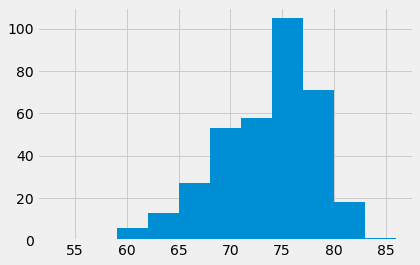

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel4 = [Measurement.date,
      ]
station_peak_data  = session.query(Measurement.tobs).filter(Measurement.date >= query_date).filter(Measurement.station == active_id)
bins = [53,56,59,62,65,68,71,74,77,80,83,86]
fix = []
for row in station_peak_data.all():
    fix.append(row[0])
steve = pd.DataFrame()
steve['Data'] = fix
plt.hist(steve['Data'], bins=bins)
plt.show()

# Close session

In [23]:
# Close Session
session.close()